## Install Libraries

In [1]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect
!pip install vaderSentiment
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Maimoona
[nltk_data]     Khilji\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Import Libraries

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

##  API Consumer and access keys

In [2]:

consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

## Retrieve Tweets

In [3]:
keyword ='#امپورٹڈ_حکومت_نامنظور'
noOfTweet = 1000

#tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
tweets = tweepy.Cursor(api.search_tweets,
              q=keyword,
              lang="en",
            since="2022-03-24").items(noOfTweet)

users_locs = [[tweet.user.screen_name, tweet.text, tweet.user.location] for tweet in tweets]
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "Tweet Text","location"])
tweet_text.to_csv('tweet_text.csv')


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

In [4]:
tweet_text.head()

,user,Tweet Text,location
0,Zulfiqa79794568,RT @zafariqbal_1: I still not going to say any...,
1,Muhamma28884935,RT @KaliwalYam: You can fool some of the peopl...,
2,Samie20981094,RT @Abdullah6877685: Wake up my nation it's ti...,
3,GworldW,RT @fawadchaudhry: #امپورٹڈ_حکومت_نامنظور #Res...,
4,FaisalM60992865,RT @MubasherAli954: ladies and gentlemen Mr Kh...,"Punjab, Pakistan"


## Sentiment Analysis without cleaning the text

In [5]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

tweet_text.rename(columns={'Tweet Text': 'Tweet_Text'}, inplace=True)

tweets = list(tweet_text.Tweet_Text)


for tweet in tweets:
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  391
negative number:  268
neutral number:  341


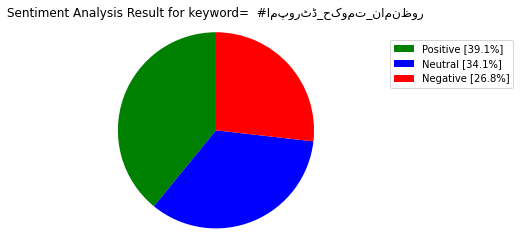

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels,loc=(1.02,0.7))
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

## Cleaning Text (RT, Punctuation etc)

In [8]:


#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @zafariqbal_1: I still not going to say any...,i still not going to say anything against pak...
1,RT @KaliwalYam: You can fool some of the peopl...,you can fool some of the people some of the t...
2,RT @Abdullah6877685: Wake up my nation it's ti...,wake up my nation it s time to make a history...
3,RT @fawadchaudhry: #امپورٹڈ_حکومت_نامنظور #Res...,respect and now o...
4,RT @MubasherAli954: ladies and gentlemen Mr Kh...,ladies and gentlemen mr khan insurance policy...
5,RT @farhanabbasi06: We stand by our BRAVE &amp...,we stand by our brave amp honest leader ...
6,RT @EKohee: #امپورٹڈ_حکومت_نامنظور\nRetweet &a...,retweet amp comment ...
7,"RT @NumanSi64322763: Imran Khan:\n""From now on...",imran khan from now onwards pakistan will o...
8,RT @MTauseefLatif: A new confusion. Dimag ko A...,a new confusion dimag ko aram b any do bae ...
9,RT @adeelrana600: I request all of you to choo...,i request all of you to choose your words car...


## Calculating Negative, Positive, Neutral and Compound values

In [9]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @zafariqbal_1: I still not going to say any...,i still not going to say anything against pak...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @KaliwalYam: You can fool some of the peopl...,you can fool some of the people some of the t...,0.000000,0.000000,negative,0.188,0.812,0.000,-0.7003
2,RT @Abdullah6877685: Wake up my nation it's ti...,wake up my nation it s time to make a history...,0.000000,0.000000,positive,0.000,0.913,0.087,0.2732
3,RT @fawadchaudhry: #امپورٹڈ_حکومت_نامنظور #Res...,respect and now o...,0.000000,0.000000,positive,0.142,0.566,0.292,0.3818
4,RT @MubasherAli954: ladies and gentlemen Mr Kh...,ladies and gentlemen mr khan insurance policy...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @farhanabbasi06: We stand by our BRAVE &amp...,we stand by our brave amp honest leader ...,0.700000,0.950000,positive,0.000,0.472,0.528,0.7717
6,RT @EKohee: #امپورٹڈ_حکومت_نامنظور\nRetweet &a...,retweet amp comment ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,"RT @NumanSi64322763: Imran Khan:\n""From now on...",imran khan from now onwards pakistan will o...,0.000000,1.000000,positive,0.000,0.851,0.149,0.5423
8,RT @MTauseefLatif: A new confusion. Dimag ko A...,a new confusion dimag ko aram b any do bae ...,0.136364,0.454545,negative,0.239,0.761,0.000,-0.2960
9,RT @adeelrana600: I request all of you to choo...,i request all of you to choose your words car...,0.250000,1.000000,positive,0.000,0.923,0.077,0.1280


In [10]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [11]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [12]:
#Count_values for sentiment
pc=count_values_in_column(tw_list,"sentiment")
pc

,Total,Percentage
positive,413,41.3
neutral,309,30.9
negative,278,27.8


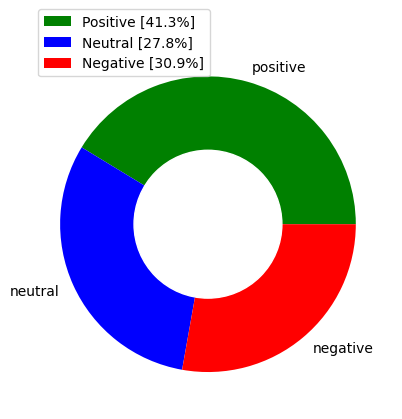

In [13]:
# create data for Pie Chart
values=list(pc.Percentage)

pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size= pc["Percentage"]
labels = ['Positive ['+str(values[0])+'%]' , 'Neutral ['+str(values[2])+'%]','Negative ['+str(values[1])+'%]']
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
plt.legend(labels,loc=(0.04,0.9))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


## WorldCloud

In [14]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

## Creating wordcloud for all tweets

Word Cloud Saved Successfully


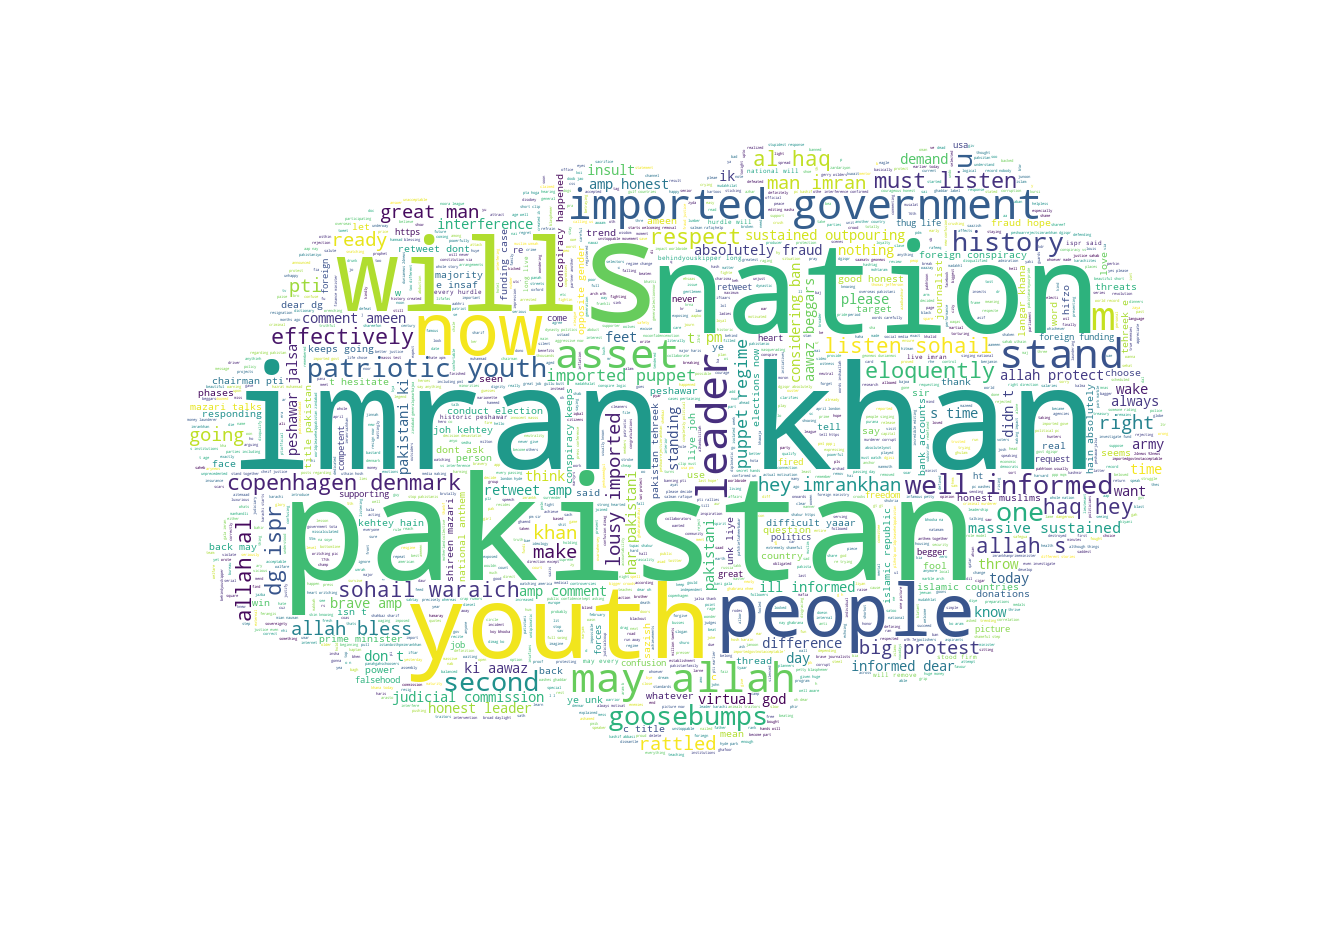

In [15]:

create_wordcloud(tw_list["text"].values)

## Creating wordcloud for positive sentiment

Word Cloud Saved Successfully


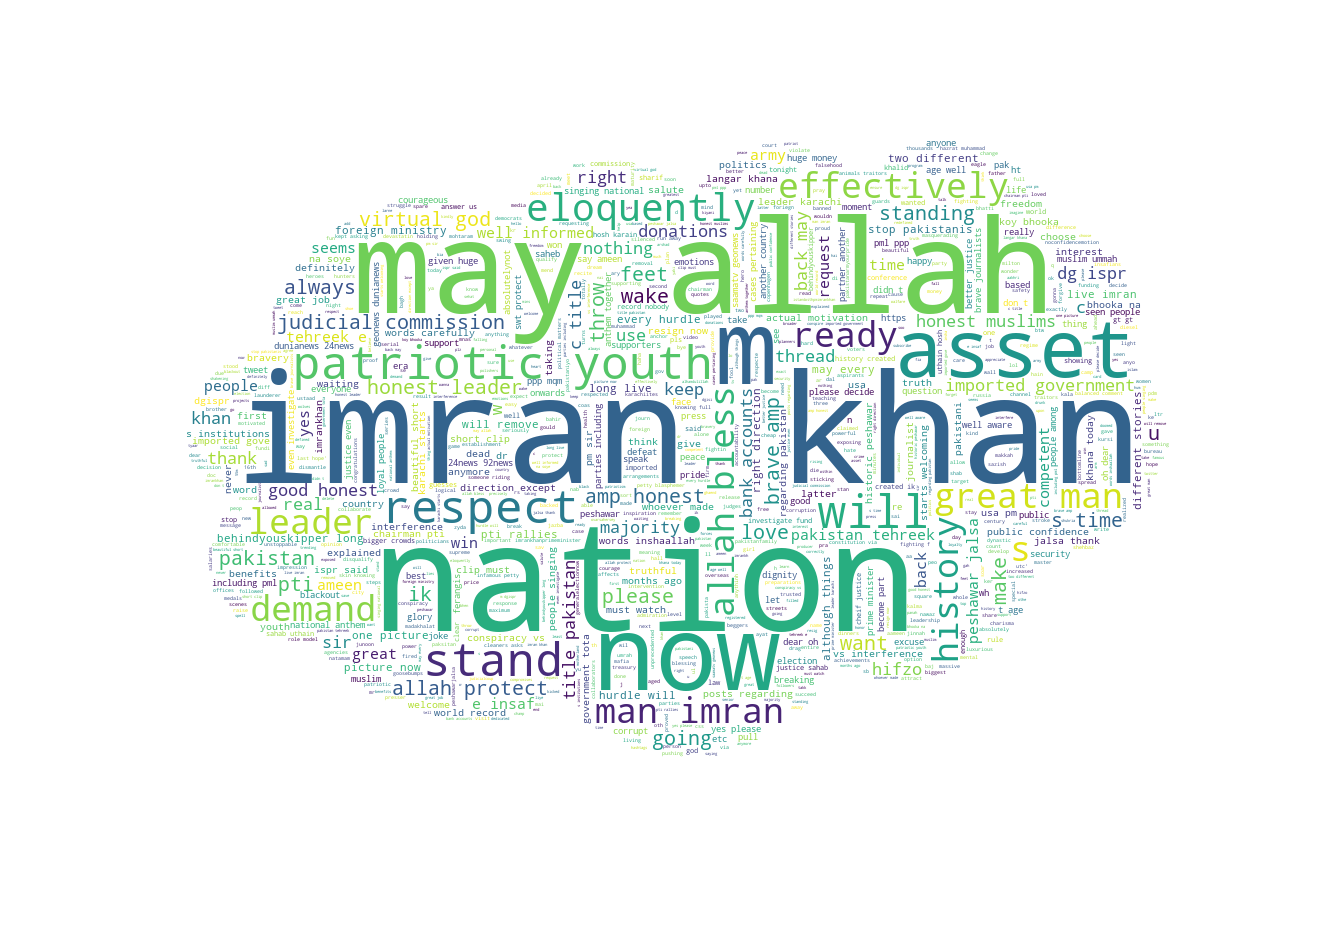

In [16]:
create_wordcloud(tw_list_positive["text"].values)

## wordcloud for negative sentiment

Word Cloud Saved Successfully


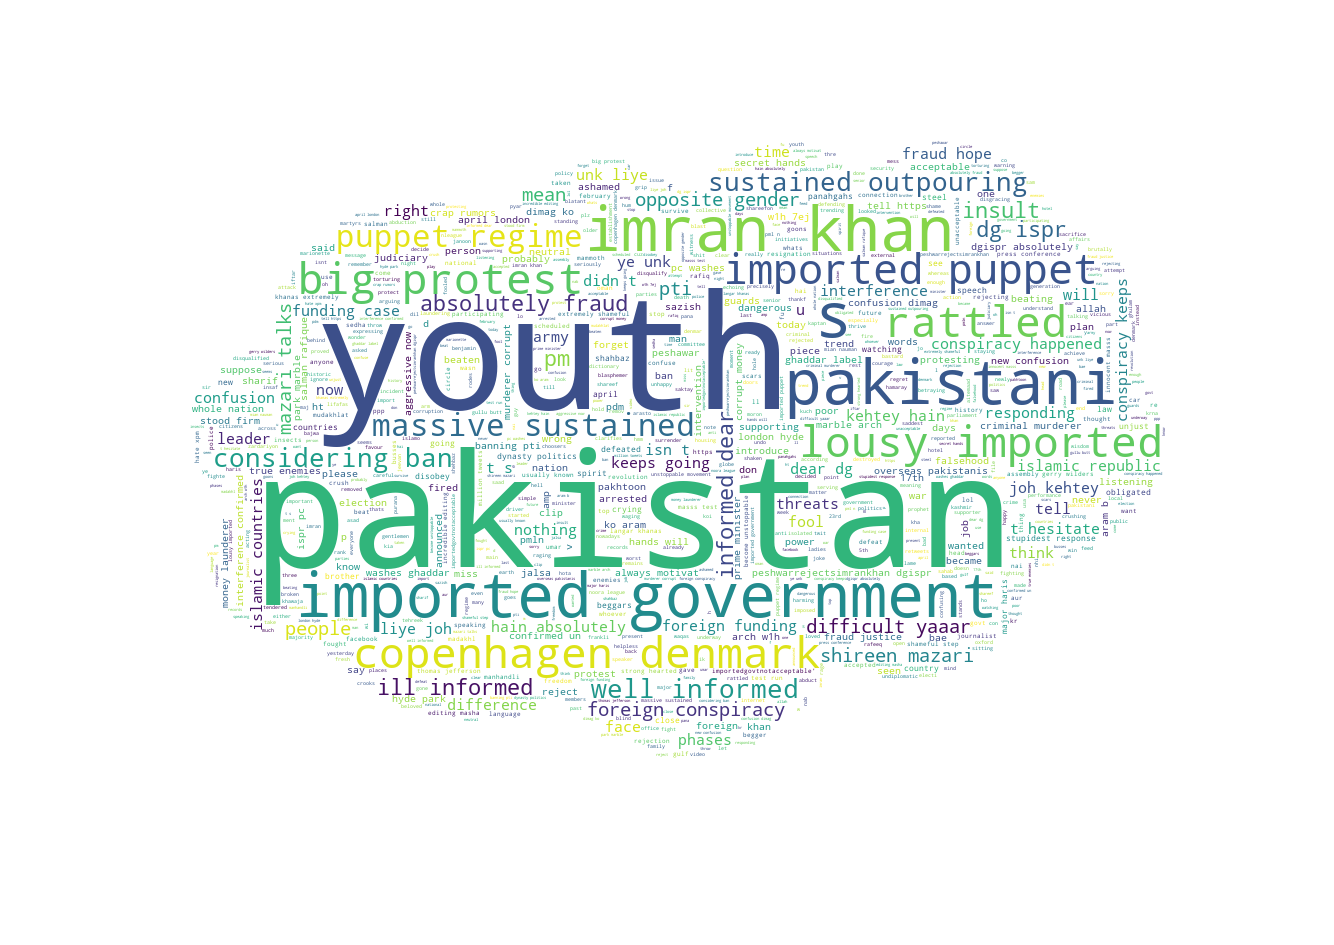

In [17]:
create_wordcloud(tw_list_negative["text"].values)

## Creating wordcloud for neutral sentiment

Word Cloud Saved Successfully


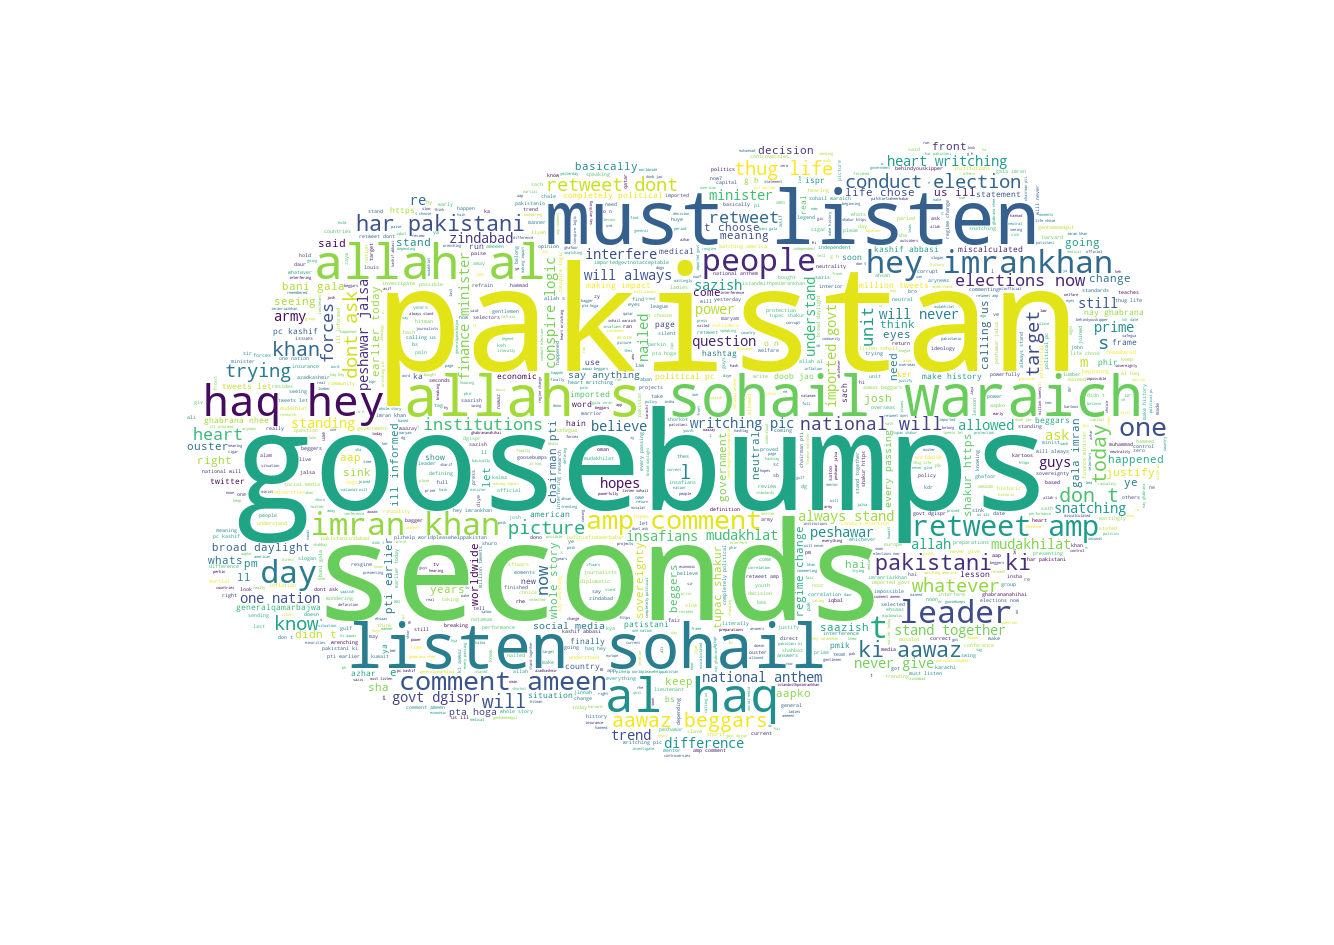

In [18]:
create_wordcloud(tw_list_neutral["text"].values)

## Calculating tweet's lenght and word count

In [19]:
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [20]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,107.81
neutral,79.32
positive,103.08


In [21]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,15.62
neutral,8.90
positive,14.82


In [22]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [23]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [24]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [25]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [26]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [27]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @zafariqbal_1: I still not going to say any...,i still not going to say anything against pak...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,123,23,i still not going to say anything against pak...,"[, i, still, not, going, to, say, anything, ag...","[, still, going, say, anything, pakistan, army...","[, still, go, say, anyth, pakistan, armi, thin..."
1,RT @KaliwalYam: You can fool some of the peopl...,you can fool some of the people some of the t...,0.0,0.0,negative,0.188,0.812,0.000,-0.7003,125,27,you can fool some of the people some of the t...,"[, you, can, fool, some, of, the, people, some...","[, fool, people, time, cannot, fool, people, t...","[, fool, peopl, time, cannot, fool, peopl, tim..."
2,RT @Abdullah6877685: Wake up my nation it's ti...,wake up my nation it s time to make a history...,0.0,0.0,positive,0.000,0.913,0.087,0.2732,119,25,wake up my nation it s time to make a history...,"[, wake, up, my, nation, it, s, time, to, make...","[, wake, nation, time, make, history, otherwis...","[, wake, nation, time, make, histori, otherwis..."
3,RT @fawadchaudhry: #امپورٹڈ_حکومت_نامنظور #Res...,respect and now o...,0.0,0.0,positive,0.142,0.566,0.292,0.3818,81,8,respect and now o...,"[, respect, and, now, our, demand, is, judicia...","[, respect, demand, judicial, commission, ]","[, respect, demand, judici, commiss, ]"
4,RT @MubasherAli954: ladies and gentlemen Mr Kh...,ladies and gentlemen mr khan insurance policy...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,84,9,ladies and gentlemen mr khan insurance policy...,"[, ladies, and, gentlemen, mr, khan, insurance...","[, ladies, gentlemen, mr, khan, insurance, pol...","[, ladi, gentlemen, mr, khan, insur, polici, p..."


In [28]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1000 Number of reviews has 1271 words


In [29]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aakhri,aameen,aap,aapko,aawaz,aban,abbasi,abduct,...,yesterday,yet,youth,yu,zardariyon,zaya,zero,zindabad,zy,zyda
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Most Used Words

In [30]:

count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
khan,150
imran,129
pakistan,119
allah,112
youth,99
nation,96
import,95
leader,69
pakistani,62
stand,59
